In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
directory_path='/kaggle/input/womens-fashion-image-dataset/women fashion'
files=os.listdir(directory_path)

In [2]:
print(files[:10])

['long, intricately designed dress with full sleeves.jpg', 'royal blue off-shoulder dress.jpg', 'bright red, form-fitting, strapless dress with a high slit on one side revealing part of the leg.jpg', 'high-waisted white trousers paired with a structured, corset-style bodice featuring mesh.jpg', 'classic black slip dress with a midi length.jpg', 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'tight-fitting, off-the-shoulder white dress.webp', 'red dress with a pattern of small white flowers.jpg', 'strapless, sequined dress that sparkles with multiple colors.jpg']


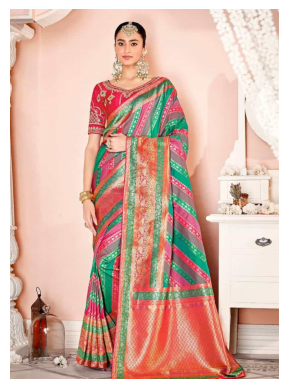

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image(file_path):
    image=Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
first_image_path=os.path.join(directory_path,files[-2])
display_image(first_image_path)
    

In [4]:
import glob
image_directory = '/kaggle/input/womens-fashion-image-dataset/women fashion'

In [5]:
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', '.webp'))]

In [6]:
print(image_paths_list)

['/kaggle/input/womens-fashion-image-dataset/women fashion/long, intricately designed dress with full sleeves.jpg', '/kaggle/input/womens-fashion-image-dataset/women fashion/royal blue off-shoulder dress.jpg', '/kaggle/input/womens-fashion-image-dataset/women fashion/bright red, form-fitting, strapless dress with a high slit on one side revealing part of the leg.jpg', '/kaggle/input/womens-fashion-image-dataset/women fashion/high-waisted white trousers paired with a structured, corset-style bodice featuring mesh.jpg', '/kaggle/input/womens-fashion-image-dataset/women fashion/classic black slip dress with a midi length.jpg', '/kaggle/input/womens-fashion-image-dataset/women fashion/anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', '/kaggle/input/womens-fashion-image-dataset/women fashion/anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace 

In [8]:
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.applications.vgg16 import preprocess_input,VGG16
from tensorflow.keras.models import Model
import numpy as np

In [9]:
base_model=VGG16(weights='imagenet',include_top=False)
model=Model(inputs=base_model.input,outputs=base_model.output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
def preprocess_image(img_path):
    img=image.load_img(img_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    img_array_expanded=np.expand_dims(img_array,axis=0)
    return preprocess_input(img_array_expanded)

In [14]:
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

In [19]:
all_features=[]
all_image_names=[]

In [20]:
for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [21]:
from scipy.spatial.distance import cosine

In [29]:
def recommed_fashion_items_cnn(input_image_path,all_features,all_image_names,model,top_n=5):
    preprocessed_img=preprocess_image(input_image_path)
    input_features=extract_features(model,preprocessed_img)
    similarities=[1-cosine(input_features,other_feature) for other_feature in all_features]
    similar_indices=np.argsort(similarities)[-top_n:]
    similar_indices=[idx for idx in similar_indices if idx!=all_image_names.index(input_image_path)]
    plt.figure(figsize=(20, 20))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')
    
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/kaggle/input/womens-fashion-image-dataset/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


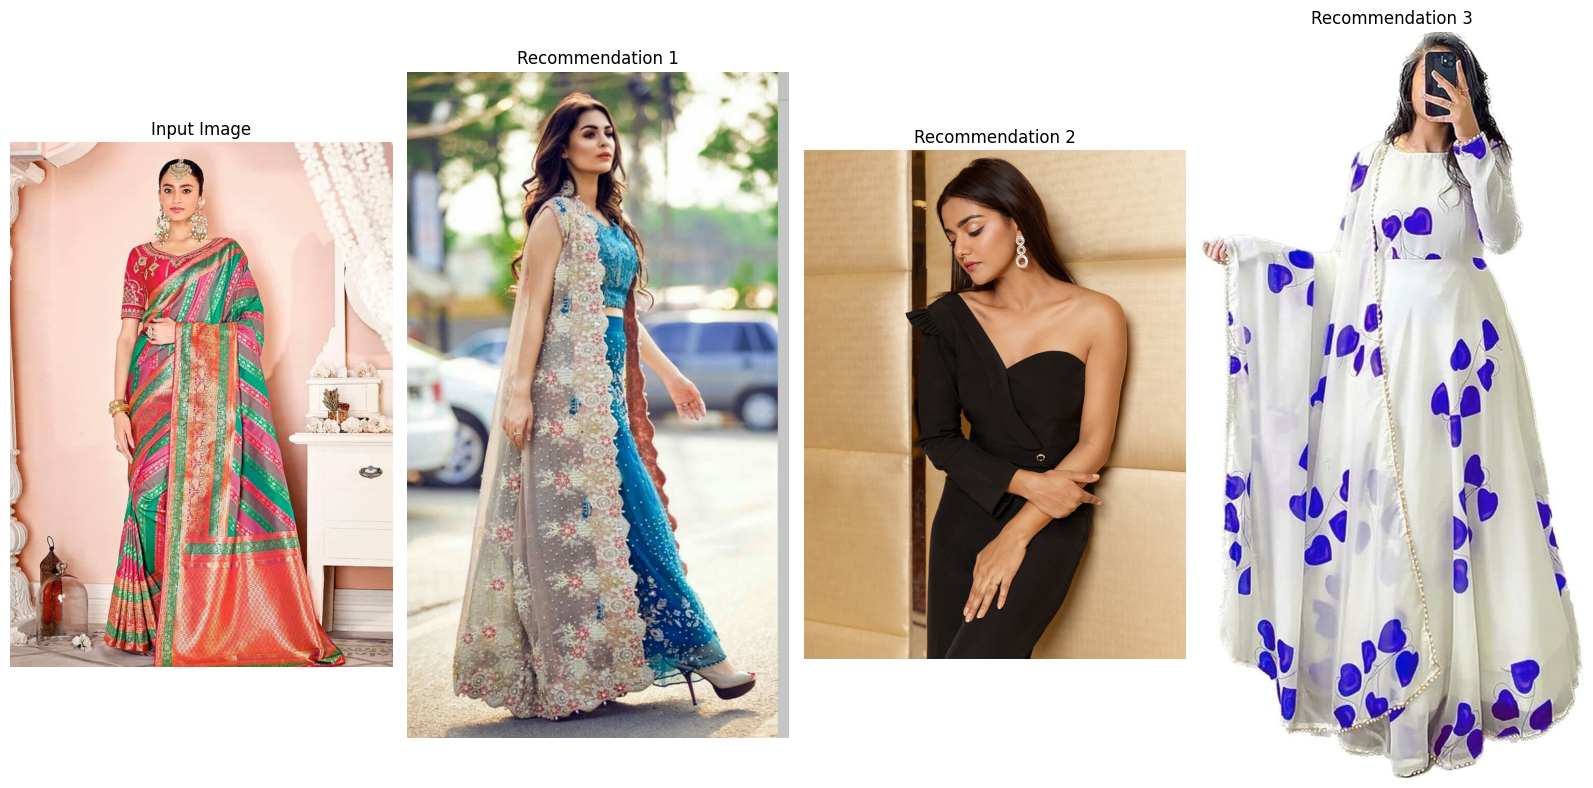

In [32]:
input_image_path = '/kaggle/input/womens-fashion-image-dataset/women fashion/colorful saree.jpg'
recommed_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)